###  How to extract data from the web, manipulate and clean data using Python's Pandas library, and data visualize using Python's Matplotlib library

## Web Scraping using Beautiful Soup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### To perform web scraping, you should also import the libraries shown below.

In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

### After importing necessary modules, you should specify the URL containing the dataset and pass it to urlopen() to get the html of the page.

In [9]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

### Getting the html of the page is just the first step. Next step is to create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. The second argument 'lxml' is the html parser whose details you do not need to worry about at this point.

In [10]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

### The soup object allows you to extract interesting information about the website you're scraping such as getting the title of the page as shown below.

In [11]:
# Get the title
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


### You can also get the text of the webpage and quickly print it out to check if it is what you expect.

In [14]:
# Print out the text
text = soup.get_text()
#print(soup.text)

## You can view the html of the webpage by right-clicking anywhere on the webpage and selecting "Inspect." This is what the result looks like.

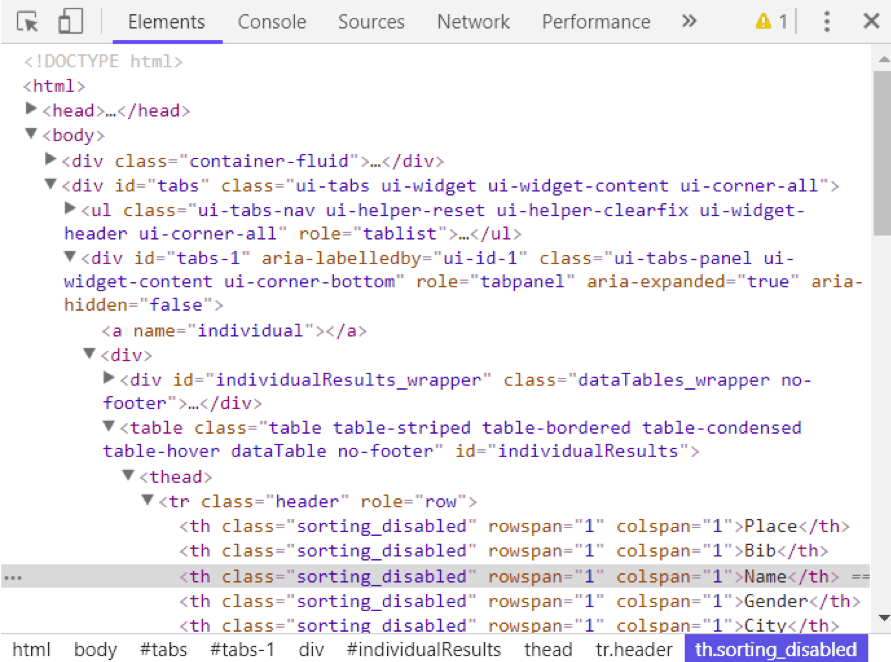

### You can use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. The code below shows how to extract all the hyperlinks within the webpage

In [15]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px">Summary</a>,
 <a class="btn btn-secondary btn-sm" href="#team" role="button"><i aria-hidden="true" class="fa fa-users"></i> Team Results</a>,
 <a class="btn btn-secondary btn-sm" href="#individual" role="button"><i aria-hidden="true" class="fa fa-user"></i> Individual Results</a>,
 <a name="team"></a>,
 <a id="individual" name="individual"></a>,
 <a href="#tabs-1" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-

### As you can see from the output above, html tags sometimes come with attributes such as class, src, etc. These attributes provide additional information about html elements. You can use a for loop and the get('"href") method to extract and print out only hyperlinks.

In [16]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/summary/2017GPTR10K
#team
#individual
None
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


## To print out table rows only, pass the 'tr' argument in soup.find_all().

In [17]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr>
<td>Award</td>
<td>Name</td>
<td>Combined Time</td>
<td>1</td><td>2</td><td>3</td><td>4</td></tr>, <tr><td>1ST</td>
<td>DTNA2</td>
<td>02:54:41</td>
<td>00:40:36 - ANDY WEDAM</td><td>00:44:05 - VASILIOS TSIRIMIAGOS</td><td>00:44:48 - ANDRE RAUCH</td><td>00:45:10 - JONATHAN PARSONS</td></tr>, <tr><td>2ND</td>
<td>INTEL TEAM K</td>
<td>03:01:02</td>
<td>00:41:43 - WILLIAM BARRY</td><td>00:42:36 - EDDIE J FRIE</td><td>00:43:46 - SAMANTHA BAGLEY</td><td>00:52:55 - JOHN HAMILTON</td></tr>, <tr><td>3RD</td>
<td>INTEL TEAM F</td>
<td>03:06:06</td>
<td>00:36:42 - NATHAN A SUSTERSIC</td><td>00:39:21 - DEREK G OSBORNE</td><td>00:52:47 - CODY L COVEY</td><td>00:57:16 - VIRAJ P MODAK</td></tr>, <tr><td>4TH</td>
<td>DTNA1</td>
<td>03:15:33</td>
<td>00:40:28 - WITALI SPULING</td><td>00:46:45 - INGA ANDREYEVA</td><td>00:54:09 - KEATON WEISENBORN

### The goal of this example is to take a table from a webpage and convert it into a dataframe for easier manipulation using Python. To get there, you should get all table rows in list form first and then convert that list into a dataframe. Below is a for loop that iterates through table rows and prints out the cells of the rows.

In [19]:
for row in rows:
    row_td = row.find_all('td')

print(row_td)

type(row_td)

[<td>577</td>, <td>443</td>, <td>LIBBY B MITCHELL</td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>163 of 163</td>, <td>F 36-45</td>, <td>56 of 56</td>, <td>0:52</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

### The output above shows that each row is printed with html tags embedded in each row. This is not what you want. You can use remove the html tags using Beautiful Soup or regular expressions.
### The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code to do this. Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

In [22]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)
type(clean2)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


str

#### Using regular expressions is highly discouraged since it requires several lines of code and one can easily make mistakes. It requires importing the re (for regular expressions) module. The code below shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row. First, you compile a regular expression by passing a string to match to re.compile(). The dot, star, and question mark (.*?) will match an opening angle bracket followed by anything and followed by a closing angle bracket. It matches text in a non-greedy fashion, that is, it matches the shortest possible string. If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket. After compiling a regular expression, you can use the re.sub() method to find all the substrings where the regular expression matches and replace them with an empty string. The full code below generates an empty list, extract text in between html tags for each row, and append it to the assigned list.

In [21]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


str

### The next step is to convert the list into a dataframe and get a quick view of the first 10 rows using Pandas.

In [23]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,"[Award, Name, Combined Time, 1, 2, 3, 4]"
5,"[1ST, DTNA2, 02:54:41, 00:40:36 - ANDY WEDAM, ..."
6,"[2ND, INTEL TEAM K, 03:01:02, 00:41:43 - WILLI..."
7,"[3RD, INTEL TEAM F, 03:06:06, 00:36:42 - NATHA..."
8,"[4TH, DTNA1, 03:15:33, 00:40:28 - WITALI SPULI..."
9,"[5TH, FXG1, 03:21:16, 00:42:56 - DAVID HERRON,..."


## Data Manipulation and Cleaning

### The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position. This is accomplished by using the str.split() method.

In [24]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,[1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,[2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,[3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,[4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,[5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


### This looks much better, but there is still work to do. The dataframe has unwanted square brackets surrounding each row. You can use the strip() method to remove the opening square bracket on column "0."

In [25]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


### The table is missing table headers. You can use the find_all() method to get the table headers.

In [26]:
col_labels = soup.find_all('th')

## Similar to table rows, you can use Beautiful Soup to extract text in between html tags for table headers.

In [27]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


## You can then convert the list of headers into a pandas dataframe.

In [28]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


### Similarly, you can split column "0" into multiple columns at the comma position for all rows.

In [29]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


### The two dataframes can be concatenated into one using the concat() method as illustrated below.

In [30]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None


## Below shows how to assign the first row to be the table header.

In [31]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None


### At this point, the table is almost properly formatted. For analysis, you can start by getting an overview of the data as shown below.

In [32]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 596
Data columns (total 14 columns):
[Place              598 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.1+ KB


(598, 14)

### The table has 597 rows and 14 columns. You can drop all rows with any missing values.

In [33]:
df6 = df5.dropna(axis=0, how='any')

### Also, notice how the table header is replicated as the first row in df5. It can be dropped using the following line of code.

In [34]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


### You can perform more data cleaning by renaming the '[Place' and ' Team]' columns. Python is very picky about space. Make sure you include space after the quotation mark in ' Team]'.

In [35]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


## The final data cleaning step involves removing the closing bracket for cells in the "Team" column.

In [50]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


In [51]:
df7

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...
25,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,6 of 414,M 18-25,1 of 34,0:06,39:55,
26,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,40:04,6:27,7 of 414,M 36-45,3 of 152,0:13,40:17,
27,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,40:05,6:27,8 of 414,M 36-45,4 of 152,0:04,40:09,
28,9,7,BRANDON THOMAS,M,,,40:17,6:29,9 of 414,M 26-35,3 of 154,0:07,40:24,\r\n ...
29,10,3,ERIK BJORNSTAD,M,,,40:21,6:30,10 of 414,M 36-45,5 of 152,0:04,40:25,\r\n ...


## It took a while to get here, but at this point, the dataframe is in the desired format. Now you can move on to the exciting part and start plotting the data and computing interesting statistics.

# Data Analysis and Visualization
### The first question to answer is, what was the average finish time (in minutes) for the runners? You need to convert the column "Chip Time" into just minutes. One way to do this is to convert the column to a list first for manipulation.

In [44]:
time_list = df7[' Chip Time'].tolist()
print(time_list)

[' 36:21', ' 36:42', ' 37:44', ' 38:34', ' 39:21', ' 39:49', ' 40:04', ' 40:05', ' 40:17', ' 40:21', ' 40:28', ' 40:36', ' 40:43', ' 41:01', ' 41:19', ' 41:43', ' 41:59', ' 42:23', ' 42:29', ' 42:35', ' 42:36', ' 42:37', ' 42:56', ' 43:26', ' 43:27', ' 43:40', ' 43:42', ' 43:43', ' 43:46', ' 43:46', ' 43:47', ' 43:47', ' 44:04', ' 44:05', ' 44:06', ' 44:07', ' 44:23', ' 44:38', ' 44:41', ' 44:42', ' 44:48', ' 45:03', ' 45:05', ' 45:10', ' 45:11', ' 45:11', ' 45:13', ' 45:14', ' 45:15', ' 45:17', ' 45:27', ' 45:28', ' 45:29', ' 45:36', ' 45:36', ' 45:40', ' 45:40', ' 45:49', ' 45:55', ' 46:02', ' 46:13', ' 46:20', ' 46:23', ' 46:26', ' 46:33', ' 46:35', ' 46:41', ' 46:42', ' 46:45', ' 46:46', ' 46:47', ' 46:49', ' 46:49', ' 46:52', ' 46:55', ' 46:56', ' 47:00', ' 47:02', ' 47:05', ' 47:05', ' 47:08', ' 47:09', ' 47:27', ' 47:29', ' 47:31', ' 47:35', ' 47:42', ' 47:45', ' 47:49', ' 47:50', ' 47:55', ' 47:56', ' 47:56', ' 47:58', ' 47:59', ' 48:09', ' 48:13', ' 48:18', ' 48:18', ' 48:20',

In [49]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h,m,s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
## https://www.datacamp.com/community/tutorials/web-scraping-using-python
## https://www.hubertiming.com/results/2017GPTR10K